# Unemployment Analysis

In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading our dataset
unemp = pd.read_csv("Unemployment in India.csv")
unemp.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
# dataset information
unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
# print random 5 rows
unemp.sample(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
221,Odisha,30-09-2019,Monthly,4.31,11167715.0,40.32,Rural
462,Goa,31-12-2019,Monthly,16.22,288154.0,42.77,Urban
644,Rajasthan,31-05-2019,Monthly,13.62,5108436.0,39.44,Urban
538,Karnataka,31-10-2019,Monthly,3.87,8799249.0,39.70,Urban
398,Assam,30-04-2020,Monthly,8.37,1454956.0,38.45,Urban


In [5]:
# find null values
unemp.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [6]:
unemp.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [7]:
unemp['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

In [8]:
unemp['Region'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

In [10]:
unemp[' Date'].value_counts()

 31-10-2019    55
 30-11-2019    55
 31-05-2019    54
 30-06-2019    54
 31-07-2019    54
 31-08-2019    53
 31-12-2019    53
 31-01-2020    53
 29-02-2020    53
 30-09-2019    52
 31-03-2020    52
 30-04-2020    51
 31-05-2020    51
 30-06-2020    50
Name:  Date, dtype: int64

In [11]:
# there's a typo in frequency values
unemp[' Frequency'].value_counts()

Monthly     381
 Monthly    359
Name:  Frequency, dtype: int64

In [13]:
# checking the correlation between Estimated Employed and Estimated Unemployment Rate (%)
unemp[' Estimated Employed'].corr(unemp[' Estimated Unemployment Rate (%)'])

-0.22287639952214786

### Data Cleaning

In [14]:
# Dropping null values and frequency column
df2 = unemp.dropna().drop(columns=[' Frequency'])
df2

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...
749,West Bengal,29-02-2020,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,15.22,9240903.0,40.67,Urban


In [22]:
# renaming columns name
df3 = df2.rename(columns={'Region':'region', ' Date':'date', ' Estimated Unemployment Rate (%)':'est_unemp_perc', \
                         ' Estimated Employed':'est_mil_emp', ' Estimated Labour Participation Rate (%)':'est_labour_perc', \
                         'Area':'area'}).reset_index(drop = True)

In [23]:
df3

,region,date,est_unemp_perc,est_mil_emp,est_labour_perc,area
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...
735,West Bengal,29-02-2020,7.55,10871168.0,44.09,Urban
736,West Bengal,31-03-2020,6.67,10806105.0,43.34,Urban
737,West Bengal,30-04-2020,15.63,9299466.0,41.20,Urban
738,West Bengal,31-05-2020,15.22,9240903.0,40.67,Urban


In [24]:
# checking the duplicates
df3.duplicated().sum()

0

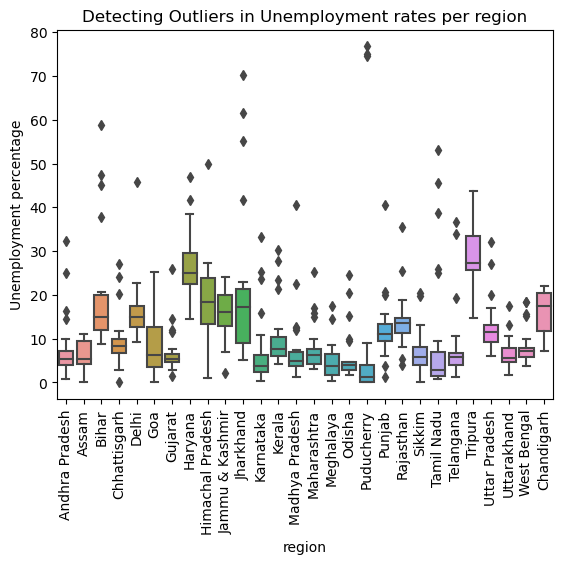

In [26]:
# checking the outliers
sns.boxplot(data=df3, x='region', y='est_unemp_perc')
plt.title('Detecting Outliers in Unemployment rates per region')
plt.ylabel('Unemployment percentage')
plt.xticks(rotation = 90)
plt.show()

### Data Visualization

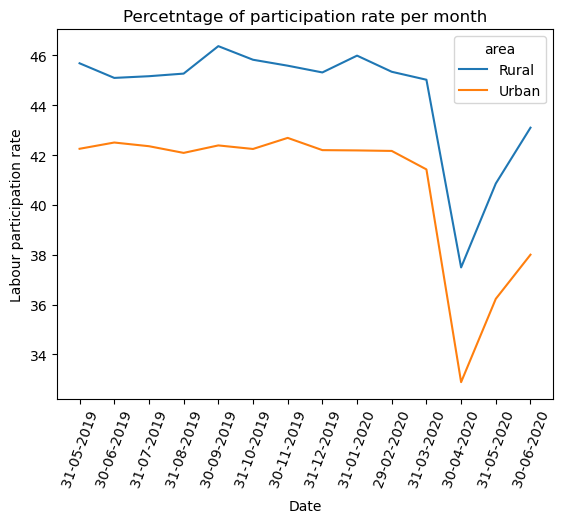

In [31]:
# particiation rate per month
sns.lineplot(data=df3, x='date', y='est_labour_perc', hue='area', errorbar=None)
plt.title('Percetntage of participation rate per month')
plt.xlabel('Date')
plt.ylabel('Labour participation rate')
plt.xticks(rotation=70)

plt.show()

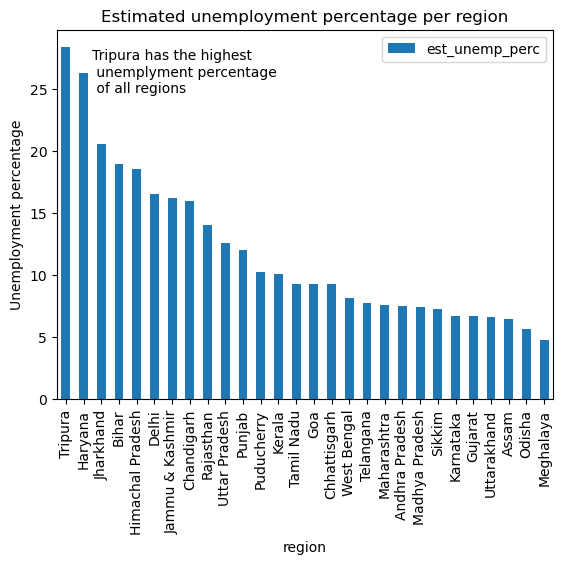

In [37]:
df5 = df3.groupby('region')[['est_unemp_perc']].mean().sort_values(by='est_unemp_perc', ascending= False)
df5.plot(kind='bar')
plt.title('Estimated unemployment percentage per region')
plt.ylabel('Unemployment percentage')
plt.xticks(rotation=90)
plt.figtext(x= 0.18, y=0.75, s='Tripura has the highest\n unemplyment percentage\n of all regions')
plt.show()

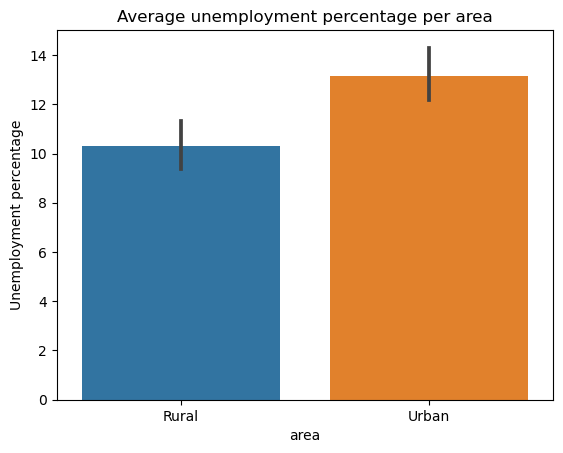

In [38]:
# area wise unemplyment rate
sns.barplot(data=df3, x='area', y='est_unemp_perc')
plt.title('Average unemployment percentage per area')
plt.ylabel('Unemployment percentage')
plt.show()

Rural area has a lower unemployment percentage than urban areas. <br>
<br>

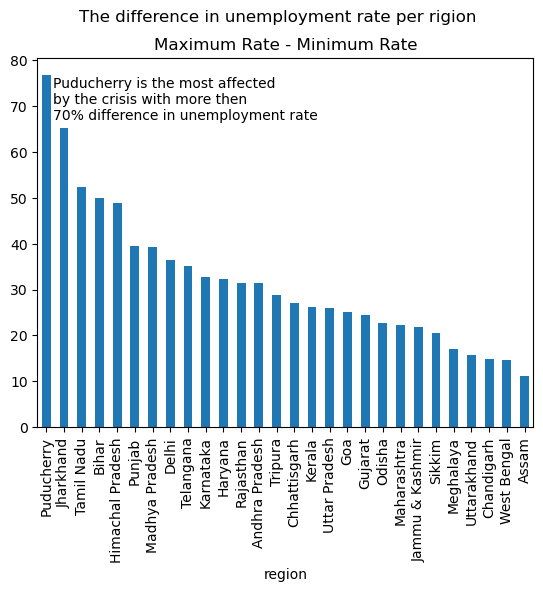

In [48]:
ax1 = df3.groupby('region')['est_unemp_perc'].agg(lambda x: max(x) - min(x)).sort_values(ascending= False).plot(kind='bar')
plt.suptitle('The difference in unemployment rate per rigion')
plt.title('Maximum Rate - Minimum Rate')
plt.figtext(x= 0.15, y= 0.75, s='Puducherry is the most affected'
                                '\nby the crisis with more then'
                                '\n70% difference in unemployment rate')
plt.show()

<h3>Conclusion</h3>

1. During the peak of the crisis in April 2020, the labor force participation rate reached its lowest point, indicating a significant decrease in economic activity.

2. Visualizations show that urban areas generally experienced higher unemployment rates compared to rural areas.

3. Some states, such as Meghalaya, had the fewest employees but also the lowest unemployment rates. In contrast, states like Puducherry were severely impacted by the crisis.

You can find this project on <a href='https://github.com/Vyas-Rishabh/Unemployment-Analysis-with-Python-OIBSIP'><b>GitHub.</b></a>